In [247]:
import json
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split #Used to split dataset into training set and test set
from sklearn.preprocessing import StandardScaler  #Used to scale the data

from sklearn import metrics as metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder #Used to encode categorical columns


from sklearn.linear_model import LogisticRegression #importing class to handle logistic classification
from sklearn.neighbors import KNeighborsClassifier #importing class to handle KNeighbors classification
from sklearn.svm import SVC  #importing class to handle support vector classification
from sklearn.naive_bayes import GaussianNB  #importing class to handle Naive bayes classification
from sklearn.tree import DecisionTreeClassifier #importing class to handle DecisionTree classification
from sklearn.ensemble import RandomForestClassifier #importing class to handle RandomForest classification

from sklearn.metrics import confusion_matrix  #used to visualised the various classification algorithm performance

import matplotlib.pyplot as plt  #used for visuallay representing the computed data 
from matplotlib.colors import ListedColormap #used for visuallay representing the computed data 

In [248]:
import tokenize
corrected = []

with open('deliveryDatasetChallenge.json', 'r') as semi:
    for token in tokenize.generate_tokens(semi.readline):
        if token[0] == tokenize.OP and token[1] == ';':
            corrected.append(',')
        else:
            corrected.append(token[1])

data = json.loads(''.join(corrected))

In [81]:
data

{'anonID;birthdate;routeDate;region;gender;areaWealthLevel;areaPopulation;badWeather;weatherRestrictions;routeTotalDistance;numberOfShops;marketShare;avgAreaBenefits;timeFromAvg;advertising;employeeLYScore;employeeTenure;employeePrevComps;success': {'0': 'XLKC1691;23/10/1969;19/05/2020;NA;M;Mid;30.66;No;No;28.3;26;49;18.9;0.35;3;4;1;1;NA',
  '1': 'KANY6459;14/04/1976;19/05/2020;LATAM;M;Mid;52.5;No;No;21.3;28;96;14.28;0.47;3;4;3;2;NA',
  '2': 'YCOG1417;16/05/1970;11/05/2020;AMESA;M;Mid;46.58;No;No;31.9;23;71;18.67;0.02;3;4;3;2;NA',
  '3': 'LRDT1582;26/11/1965;11/05/2020;APAC;M;Mid;5.2;No;No;25.1;27;79;14.99;-0.07;3;3;2;1;NA',
  '4': 'NVNN3276;14/07/1988;12/05/2020;Europe;M;Mid;5.2;No;No;26.4;26;67;21.71;0.3;3;4;1;2;NA',
  '5': 'KRKX1457;11/04/1974;22/05/2020;LATAM;M;Mid;43.79;No;No;31.5;23;64;18.74;NA;3;3;0;1;NA',
  '6': 'YMMN6647;20/09/1982;22/05/2020;NA;M;High;4.48;No;No;22.8;27;72;11.9;NA;1;3;2;1;NA',
  '7': 'YYNU4768;15/09/1987;12/05/2020;NA;M;High;29.18;No;No;21.6;23;78;17.11;0.57;

In [249]:
headers_keys = []
rows_values = []
items = data.items()
for item in items:
    headers_keys.append(item[0]), rows_values.append(item[1])
  
# printing keys and values separately
print ("Headers : ", str(headers_keys))
print ("Row values : ", str(rows_values))


Headers :  ['anonID;birthdate;routeDate;region;gender;areaWealthLevel;areaPopulation;badWeather;weatherRestrictions;routeTotalDistance;numberOfShops;marketShare;avgAreaBenefits;timeFromAvg;advertising;employeeLYScore;employeeTenure;employeePrevComps;success']
Row values :  [{'0': 'XLKC1691;23/10/1969;19/05/2020;NA;M;Mid;30.66;No;No;28.3;26;49;18.9;0.35;3;4;1;1;NA', '1': 'KANY6459;14/04/1976;19/05/2020;LATAM;M;Mid;52.5;No;No;21.3;28;96;14.28;0.47;3;4;3;2;NA', '2': 'YCOG1417;16/05/1970;11/05/2020;AMESA;M;Mid;46.58;No;No;31.9;23;71;18.67;0.02;3;4;3;2;NA', '3': 'LRDT1582;26/11/1965;11/05/2020;APAC;M;Mid;5.2;No;No;25.1;27;79;14.99;-0.07;3;3;2;1;NA', '4': 'NVNN3276;14/07/1988;12/05/2020;Europe;M;Mid;5.2;No;No;26.4;26;67;21.71;0.3;3;4;1;2;NA', '5': 'KRKX1457;11/04/1974;22/05/2020;LATAM;M;Mid;43.79;No;No;31.5;23;64;18.74;NA;3;3;0;1;NA', '6': 'YMMN6647;20/09/1982;22/05/2020;NA;M;High;4.48;No;No;22.8;27;72;11.9;NA;1;3;2;1;NA', '7': 'YYNU4768;15/09/1987;12/05/2020;NA;M;High;29.18;No;No;21.6;23;78

In [250]:
headers = [value.replace(';', ',') for value in headers_keys]

In [207]:
headers

['anonID,birthdate,routeDate,region,gender,areaWealthLevel,areaPopulation,badWeather,weatherRestrictions,routeTotalDistance,numberOfShops,marketShare,avgAreaBenefits,timeFromAvg,advertising,employeeLYScore,employeeTenure,employeePrevComps,success']

In [251]:
headers_list = headers[0].replace(' ', '').replace("'", '')[1:].split(',')
headers_list

['nonID',
 'birthdate',
 'routeDate',
 'region',
 'gender',
 'areaWealthLevel',
 'areaPopulation',
 'badWeather',
 'weatherRestrictions',
 'routeTotalDistance',
 'numberOfShops',
 'marketShare',
 'avgAreaBenefits',
 'timeFromAvg',
 'advertising',
 'employeeLYScore',
 'employeeTenure',
 'employeePrevComps',
 'success']

In [8]:
rows_values

[{'0': 'XLKC1691;23/10/1969;19/05/2020;NA;M;Mid;30.66;No;No;28.3;26;49;18.9;0.35;3;4;1;1;NA',
  '1': 'KANY6459;14/04/1976;19/05/2020;LATAM;M;Mid;52.5;No;No;21.3;28;96;14.28;0.47;3;4;3;2;NA',
  '2': 'YCOG1417;16/05/1970;11/05/2020;AMESA;M;Mid;46.58;No;No;31.9;23;71;18.67;0.02;3;4;3;2;NA',
  '3': 'LRDT1582;26/11/1965;11/05/2020;APAC;M;Mid;5.2;No;No;25.1;27;79;14.99;-0.07;3;3;2;1;NA',
  '4': 'NVNN3276;14/07/1988;12/05/2020;Europe;M;Mid;5.2;No;No;26.4;26;67;21.71;0.3;3;4;1;2;NA',
  '5': 'KRKX1457;11/04/1974;22/05/2020;LATAM;M;Mid;43.79;No;No;31.5;23;64;18.74;NA;3;3;0;1;NA',
  '6': 'YMMN6647;20/09/1982;22/05/2020;NA;M;High;4.48;No;No;22.8;27;72;11.9;NA;1;3;2;1;NA',
  '7': 'YYNU4768;15/09/1987;12/05/2020;NA;M;High;29.18;No;No;21.6;23;78;17.11;0.57;2;3;2;1;NA',
  '8': 'IRYE3545;12/09/1986;18/05/2020;APAC;M;Mid;4.49;No;No;23.4;29;46;21.78;NA;0;3;1;0;NA',
  '9': 'SDBM5708;19/09/1969;19/05/2020;NA;F;Mid;58.11;No;No;22.7;21;90;23.81;NA;3;5;3;1;NA',
  '10': 'ULUZ5859;03/04/1985;NA;NA;M;High;25.08;

In [252]:
headers_keys = []
rows_values = []
items = data.items()
for item in items:
    headers_keys.append(item[0]), rows_values.append(item[1])
  
# printing keys and values separately
print ("Headers : ", str(headers_keys))
print ("Row values : ", str(rows_values))


Headers :  ['anonID;birthdate;routeDate;region;gender;areaWealthLevel;areaPopulation;badWeather;weatherRestrictions;routeTotalDistance;numberOfShops;marketShare;avgAreaBenefits;timeFromAvg;advertising;employeeLYScore;employeeTenure;employeePrevComps;success']
Row values :  [{'0': 'XLKC1691;23/10/1969;19/05/2020;NA;M;Mid;30.66;No;No;28.3;26;49;18.9;0.35;3;4;1;1;NA', '1': 'KANY6459;14/04/1976;19/05/2020;LATAM;M;Mid;52.5;No;No;21.3;28;96;14.28;0.47;3;4;3;2;NA', '2': 'YCOG1417;16/05/1970;11/05/2020;AMESA;M;Mid;46.58;No;No;31.9;23;71;18.67;0.02;3;4;3;2;NA', '3': 'LRDT1582;26/11/1965;11/05/2020;APAC;M;Mid;5.2;No;No;25.1;27;79;14.99;-0.07;3;3;2;1;NA', '4': 'NVNN3276;14/07/1988;12/05/2020;Europe;M;Mid;5.2;No;No;26.4;26;67;21.71;0.3;3;4;1;2;NA', '5': 'KRKX1457;11/04/1974;22/05/2020;LATAM;M;Mid;43.79;No;No;31.5;23;64;18.74;NA;3;3;0;1;NA', '6': 'YMMN6647;20/09/1982;22/05/2020;NA;M;High;4.48;No;No;22.8;27;72;11.9;NA;1;3;2;1;NA', '7': 'YYNU4768;15/09/1987;12/05/2020;NA;M;High;29.18;No;No;21.6;23;78

In [253]:
df = pd.DataFrame(rows_values[0].values())

In [254]:
df[0]

0        XLKC1691;23/10/1969;19/05/2020;NA;M;Mid;30.66;...
1        KANY6459;14/04/1976;19/05/2020;LATAM;M;Mid;52....
2        YCOG1417;16/05/1970;11/05/2020;AMESA;M;Mid;46....
3        LRDT1582;26/11/1965;11/05/2020;APAC;M;Mid;5.2;...
4        NVNN3276;14/07/1988;12/05/2020;Europe;M;Mid;5....
                               ...                        
29384    OUTD7137;19/01/1978;12/05/2020;NA;F;Mid;5.46;N...
29385    CENS9763;17/04/1985;11/05/2020;APAC;M;Mid;6.75...
29386    UQOB3163;02/03/1980;22/05/2020;NA;M;High;36.88...
29387    YSBL6235;10/08/1988;12/05/2020;NA;M;NA;16.25;N...
29388    OCAG2566;09/10/1962;NA;NA;M;High;24.13;No;No;2...
Name: 0, Length: 29389, dtype: object

In [255]:
df = df[0].str.split(';',expand=True)
df.head()

0           1           2       3  4    5      6   7   8     9   10  \
0  XLKC1691  23/10/1969  19/05/2020      NA  M  Mid  30.66  No  No  28.3  26   
1  KANY6459  14/04/1976  19/05/2020   LATAM  M  Mid   52.5  No  No  21.3  28   
2  YCOG1417  16/05/1970  11/05/2020   AMESA  M  Mid  46.58  No  No  31.9  23   
3  LRDT1582  26/11/1965  11/05/2020    APAC  M  Mid    5.2  No  No  25.1  27   
4  NVNN3276  14/07/1988  12/05/2020  Europe  M  Mid    5.2  No  No  26.4  26   

   11     12     13 14 15 16 17  18  
0  49   18.9   0.35  3  4  1  1  NA  
1  96  14.28   0.47  3  4  3  2  NA  
2  71  18.67   0.02  3  4  3  2  NA  
3  79  14.99  -0.07  3  3  2  1  NA  
4  67  21.71    0.3  3  4  1  2  NA

In [256]:
df.columns = headers_list
df

nonID   birthdate   routeDate  region gender areaWealthLevel  \
0      XLKC1691  23/10/1969  19/05/2020      NA      M             Mid   
1      KANY6459  14/04/1976  19/05/2020   LATAM      M             Mid   
2      YCOG1417  16/05/1970  11/05/2020   AMESA      M             Mid   
3      LRDT1582  26/11/1965  11/05/2020    APAC      M             Mid   
4      NVNN3276  14/07/1988  12/05/2020  Europe      M             Mid   
...         ...         ...         ...     ...    ...             ...   
29384  OUTD7137  19/01/1978  12/05/2020      NA      F             Mid   
29385  CENS9763  17/04/1985  11/05/2020    APAC      M             Mid   
29386  UQOB3163  02/03/1980  22/05/2020      NA      M            High   
29387  YSBL6235  10/08/1988  12/05/2020      NA      M              NA   
29388  OCAG2566  09/10/1962          NA      NA      M            High   

      areaPopulation badWeather weatherRestrictions routeTotalDistance  \
0              30.66         No                  No               28.3   
1               52.5         No                  No               21.3   
2              46.58         No                  No               31.9   
3                5.2         No                  No               25.1   
4                5.2         No                  No               26.4   
...              ...        ...                 ...                ...   
29384           5.46         No                  No               26.3   
29385           6.75         No                  No               22.9   
29386          36.88         No                  No               24.1   
29387          16.25         No                  No               25.6   
29388          24.13         No                  No               28.7   

      numberOfShops marketShare avgAreaBenefits timeFromAvg advertising  \
0                26          49            18.9        0.35           3   
1                28          96           14.28        0.47           3   
2                23          71           18.67        0.02           3   
3                27          79           14.99       -0.07           3   
4                26          67           21.71         0.3           3   
...             ...         ...             ...         ...         ...   
29384            26          77           16.48          NA           1   
29385            25          53           21.02        0.29           2   
29386            29          72           22.64        0.38           3   
29387            28          55           19.88          NA           3   
29388            22          57           20.68       -0.28           3   

      employeeLYScore employeeTenure employeePrevComps success  
0                   4              1                 1      NA  
1                   4              3                 2      NA  
2                   4              3                 2      NA  
3                   3              2                 1      NA  
4                   4              1                 2      NA  
...               ...            ...               ...     ...  
29384               3              0                 1       1  
29385               3              2                 2       1  
29386               4              2                 2       1  
29387               3              1                 0       1  
29388               3              2                 2       1  

[29389 rows x 19 columns]

In [257]:
df = df.rename({'nonID': 'anonID'}, axis=1) 
df

anonID   birthdate   routeDate  region gender areaWealthLevel  \
0      XLKC1691  23/10/1969  19/05/2020      NA      M             Mid   
1      KANY6459  14/04/1976  19/05/2020   LATAM      M             Mid   
2      YCOG1417  16/05/1970  11/05/2020   AMESA      M             Mid   
3      LRDT1582  26/11/1965  11/05/2020    APAC      M             Mid   
4      NVNN3276  14/07/1988  12/05/2020  Europe      M             Mid   
...         ...         ...         ...     ...    ...             ...   
29384  OUTD7137  19/01/1978  12/05/2020      NA      F             Mid   
29385  CENS9763  17/04/1985  11/05/2020    APAC      M             Mid   
29386  UQOB3163  02/03/1980  22/05/2020      NA      M            High   
29387  YSBL6235  10/08/1988  12/05/2020      NA      M              NA   
29388  OCAG2566  09/10/1962          NA      NA      M            High   

      areaPopulation badWeather weatherRestrictions routeTotalDistance  \
0              30.66         No                  No               28.3   
1               52.5         No                  No               21.3   
2              46.58         No                  No               31.9   
3                5.2         No                  No               25.1   
4                5.2         No                  No               26.4   
...              ...        ...                 ...                ...   
29384           5.46         No                  No               26.3   
29385           6.75         No                  No               22.9   
29386          36.88         No                  No               24.1   
29387          16.25         No                  No               25.6   
29388          24.13         No                  No               28.7   

      numberOfShops marketShare avgAreaBenefits timeFromAvg advertising  \
0                26          49            18.9        0.35           3   
1                28          96           14.28        0.47           3   
2                23          71           18.67        0.02           3   
3                27          79           14.99       -0.07           3   
4                26          67           21.71         0.3           3   
...             ...         ...             ...         ...         ...   
29384            26          77           16.48          NA           1   
29385            25          53           21.02        0.29           2   
29386            29          72           22.64        0.38           3   
29387            28          55           19.88          NA           3   
29388            22          57           20.68       -0.28           3   

      employeeLYScore employeeTenure employeePrevComps success  
0                   4              1                 1      NA  
1                   4              3                 2      NA  
2                   4              3                 2      NA  
3                   3              2                 1      NA  
4                   4              1                 2      NA  
...               ...            ...               ...     ...  
29384               3              0                 1       1  
29385               3              2                 2       1  
29386               4              2                 2       1  
29387               3              1                 0       1  
29388               3              2                 2       1  

[29389 rows x 19 columns]

In [216]:
final_test_dataset = df.loc[df['success'] == 'NA']
final_test_dataset.shape

(5878, 19)

# Cleaning the Data

## dealing with the missing values



Before we dive in to data analysis, we should perform basic cleaning. Look for:

Any missing values (np.None or np.NaN) in entire dataset

Any duplicated samples in dataset



In [16]:
df.isnull().sum()

anonID                 0
birthdate              0
routeDate              0
region                 0
gender                 0
areaWealthLevel        0
areaPopulation         0
badWeather             0
weatherRestrictions    0
routeTotalDistance     0
numberOfShops          0
marketShare            0
avgAreaBenefits        0
timeFromAvg            0
advertising            0
employeeLYScore        0
employeeTenure         0
employeePrevComps      0
success                0
dtype: int64

In [17]:
df.describe()

anonID   birthdate routeDate region gender areaWealthLevel  \
count      29389       29389     29389  29389  29389           29389   
unique     29389       10181        11      5      3               4   
top     XLKC1691  21/09/1970        NA     NA      M             Mid   
freq           1          12      5047   8773  27147           13293   

       areaPopulation badWeather weatherRestrictions routeTotalDistance  \
count           29389      29389               29389              29389   
unique           6775          2                   2                280   
top              5.88         No                  No               23.5   
freq              204      26897               28962                688   

       numberOfShops marketShare avgAreaBenefits timeFromAvg advertising  \
count          29389       29389           29389       29389       29389   
unique            15          81            3201         272           4   
top               24          69           18.48          NA           3   
freq            4012         890             227       11618       12299   

       employeeLYScore employeeTenure employeePrevComps success  
count            29389          29389             29389   29389  
unique               5              4                 4       3  
top                  3              2                 2       1  
freq             15402          11463             14999   22647

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29389 entries, 0 to 29388
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   anonID               29389 non-null  object
 1   birthdate            29389 non-null  object
 2   routeDate            29389 non-null  object
 3   region               29389 non-null  object
 4   gender               29389 non-null  object
 5   areaWealthLevel      29389 non-null  object
 6   areaPopulation       29389 non-null  object
 7   badWeather           29389 non-null  object
 8   weatherRestrictions  29389 non-null  object
 9   routeTotalDistance   29389 non-null  object
 10  numberOfShops        29389 non-null  object
 11  marketShare          29389 non-null  object
 12  avgAreaBenefits      29389 non-null  object
 13  timeFromAvg          29389 non-null  object
 14  advertising          29389 non-null  object
 15  employeeLYScore      29389 non-null  object
 16  empl

In [19]:
df.dtypes

anonID                 object
birthdate              object
routeDate              object
region                 object
gender                 object
areaWealthLevel        object
areaPopulation         object
badWeather             object
weatherRestrictions    object
routeTotalDistance     object
numberOfShops          object
marketShare            object
avgAreaBenefits        object
timeFromAvg            object
advertising            object
employeeLYScore        object
employeeTenure         object
employeePrevComps      object
success                object
dtype: object

In [258]:
df = df.replace('NA', np.nan)

In [259]:
df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df.reset_index(drop=True, inplace=True)
df.shape

(7453, 19)

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7453 entries, 0 to 7452
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   anonID               7453 non-null   object
 1   birthdate            7453 non-null   object
 2   routeDate            7453 non-null   object
 3   region               7453 non-null   object
 4   gender               7453 non-null   object
 5   areaWealthLevel      7453 non-null   object
 6   areaPopulation       7453 non-null   object
 7   badWeather           7453 non-null   object
 8   weatherRestrictions  7453 non-null   object
 9   routeTotalDistance   7453 non-null   object
 10  numberOfShops        7453 non-null   object
 11  marketShare          7453 non-null   object
 12  avgAreaBenefits      7453 non-null   object
 13  timeFromAvg          7453 non-null   object
 14  advertising          7453 non-null   object
 15  employeeLYScore      7453 non-null   object
 16  employ

In [261]:
df['birthdate']= pd.to_datetime(df['birthdate'])
df['routeDate']= pd.to_datetime(df['routeDate'])
df['numberOfShops'] = df['numberOfShops'].astype('int')
df['areaPopulation'] = df['areaPopulation'].astype('float16')
df['avgAreaBenefits'] = df['avgAreaBenefits'].astype('float16')
df['timeFromAvg'] = df['timeFromAvg'].astype('float16')
df['routeTotalDistance'] = df['routeTotalDistance'].astype('float16')
df['marketShare'] = df['marketShare'].astype('int')

In [24]:
df[df.isnull().any(axis=1)].count()

anonID                 0
birthdate              0
routeDate              0
region                 0
gender                 0
areaWealthLevel        0
areaPopulation         0
badWeather             0
weatherRestrictions    0
routeTotalDistance     0
numberOfShops          0
marketShare            0
avgAreaBenefits        0
timeFromAvg            0
advertising            0
employeeLYScore        0
employeeTenure         0
employeePrevComps      0
success                0
dtype: int64

In [262]:
df['success'].value_counts()

1    7179
0     274
Name: success, dtype: int64

<AxesSubplot:xlabel='success', ylabel='count'>

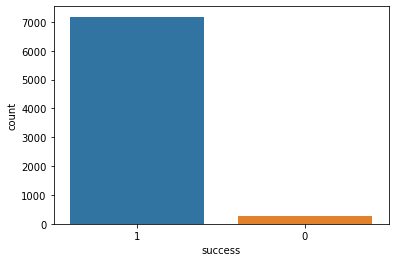

In [263]:
sns.countplot(data=df, x='success')

<AxesSubplot:xlabel='gender', ylabel='count'>

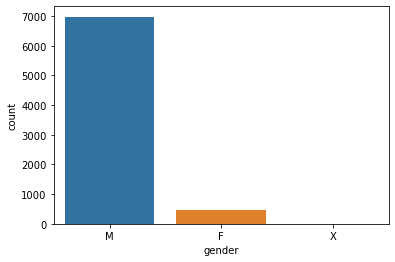

In [264]:
sns.countplot(data=df, x='gender')

## Success VS gender

/Users/mohammedhussain/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

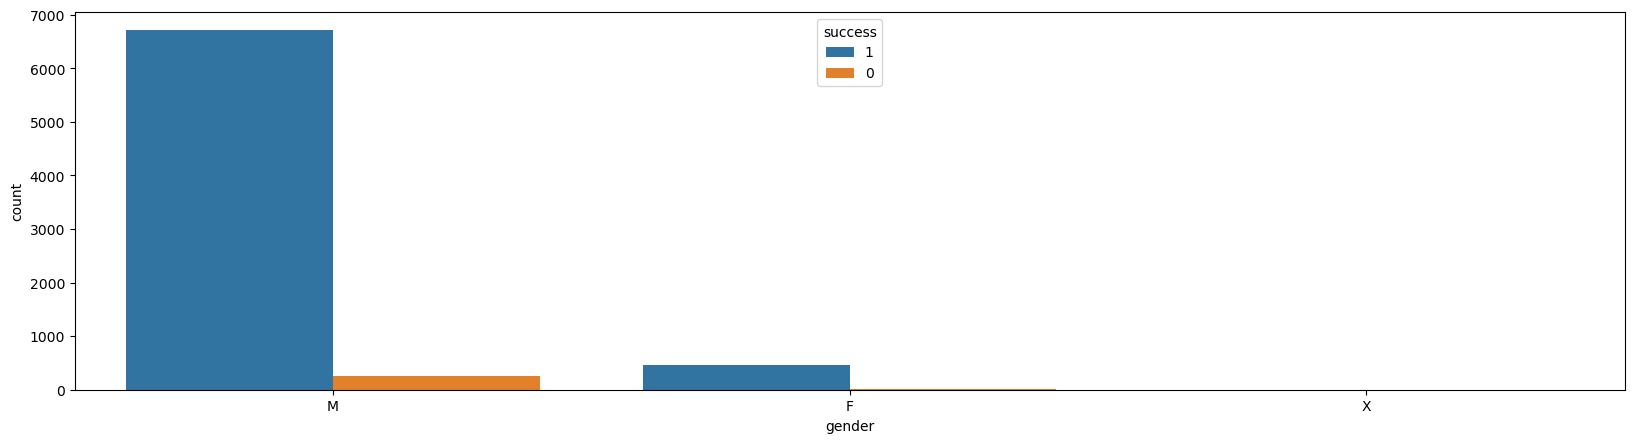

In [266]:
plt.figure(figsize=(20,5),dpi=100)
sns.countplot(df['gender'], hue=df.success)

## Success VS areaWealthLevel

/Users/mohammedhussain/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='areaWealthLevel', ylabel='count'>

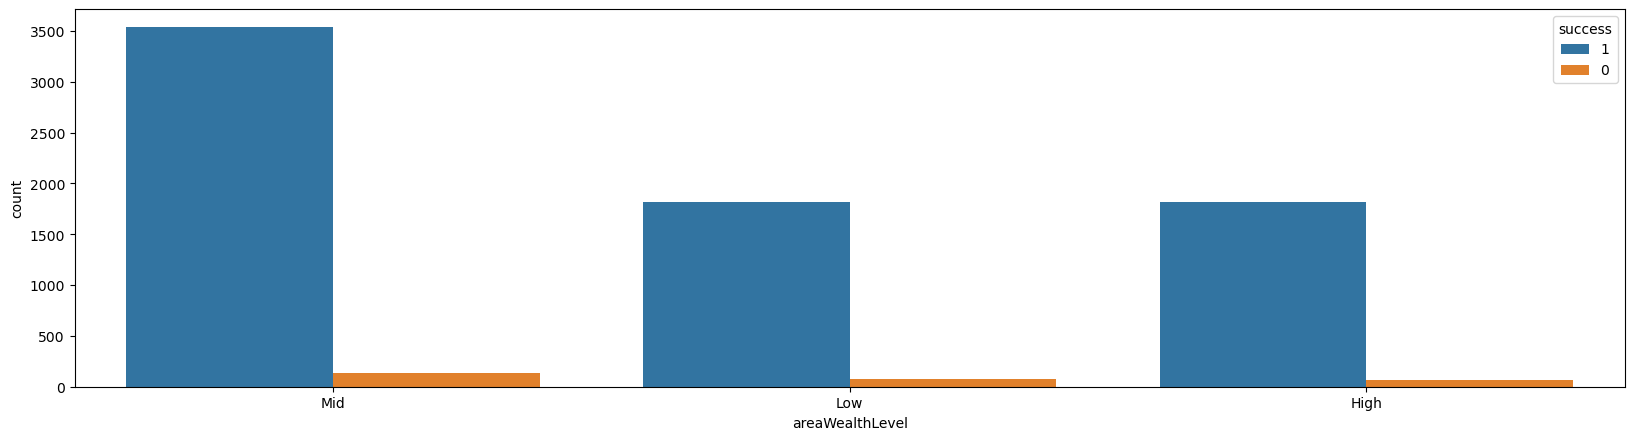

In [267]:
plt.figure(figsize=(20,5),dpi=100)
sns.countplot(df['areaWealthLevel'], hue=df.success)

# Success VS badWeather

/Users/mohammedhussain/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='badWeather', ylabel='count'>

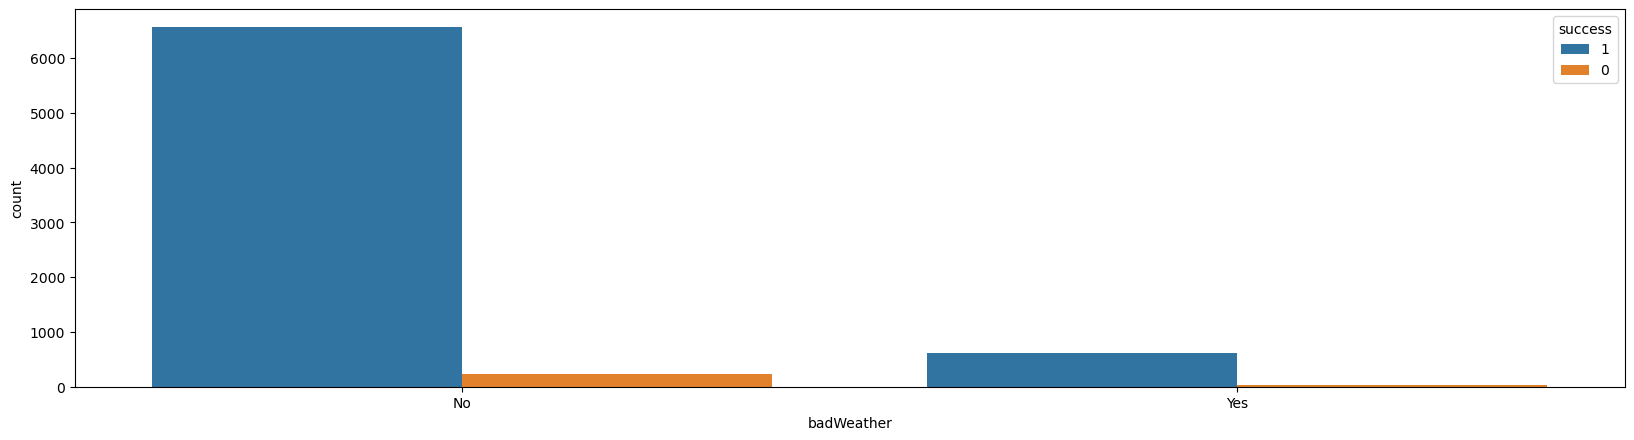

In [268]:
plt.figure(figsize=(20,5),dpi=100)
sns.countplot(df['badWeather'], hue=df.success)

# Success VS WeatherRestrictions

/Users/mohammedhussain/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weatherRestrictions', ylabel='count'>

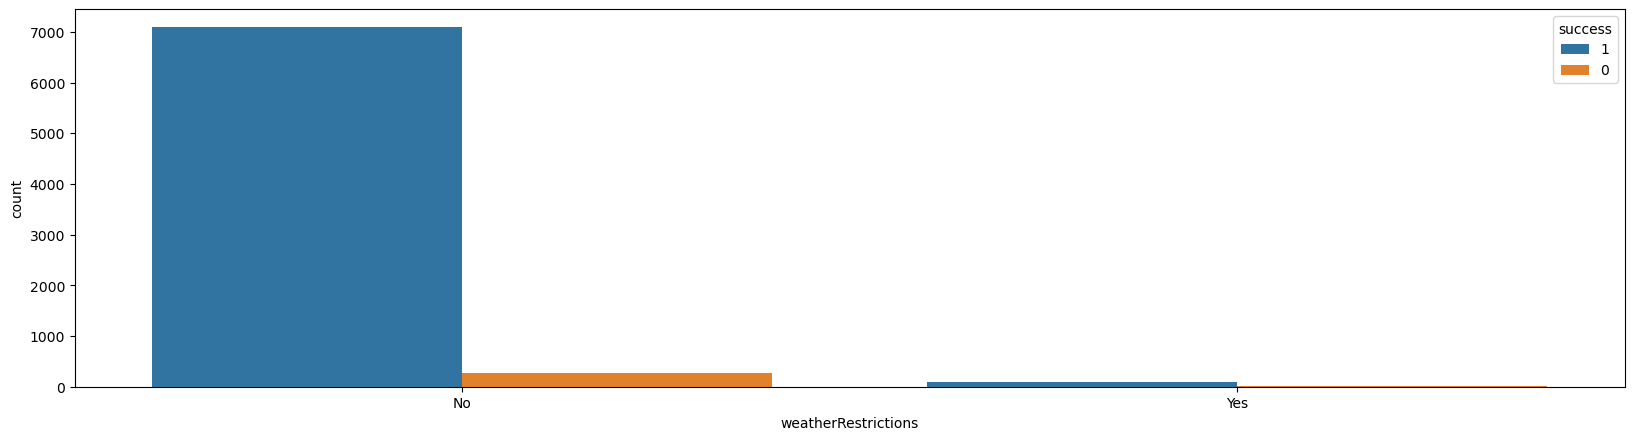

In [269]:
plt.figure(figsize=(20,5),dpi=100)
sns.countplot(df['weatherRestrictions'], hue=df.success)

In [270]:
def feature_plot(df, target, col): 
    categories = df[col].value_counts().index.to_list()
    n_categories = len(categories)
    if n_categories < 20 or df[col].dtype != 'int64':
        print(df[col].value_counts())
    
    plt.figure(figsize = (14,10))
    if df[col].dtype == 'int64':
        plt.subplot(2,1,1)
        if n_categories < 30:
            sns.distplot(df[col], bins = n_categories)
        else:
            sns.distplot(df[col], bins = 20)           
        plt.subplot(2,1,2)
        sns.lineplot(x = col, y = target, data = df)
    else:
        if n_categories < 20:
            plt.subplot(2,1,1)
            sns.countplot(x = col, data = df) 
            plt.subplot(2,1,2)
            sns.boxplot(x = col, y = target, data = df)
    plt.show()

1    7179
0     274
Name: success, dtype: int64


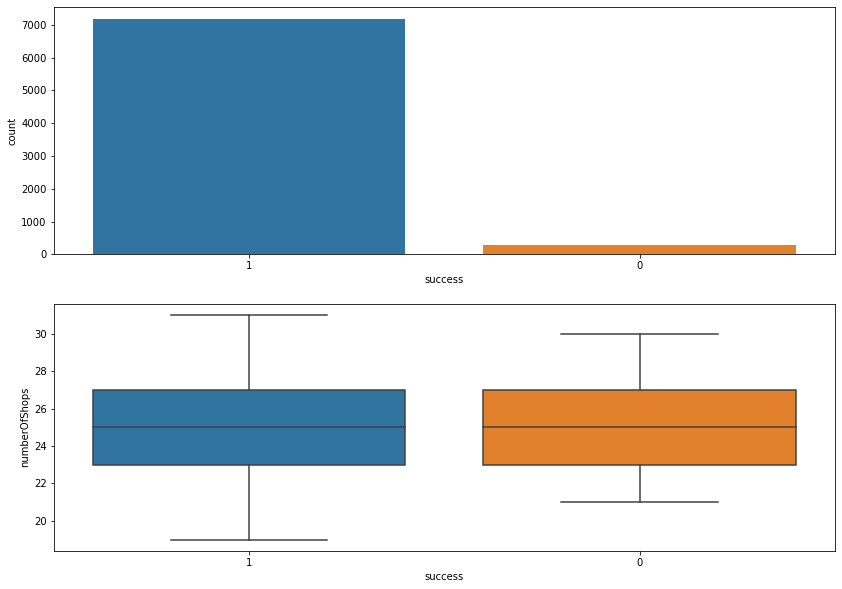

In [272]:
feature_plot(df, 'numberOfShops','success')

1    7179
0     274
Name: success, dtype: int64


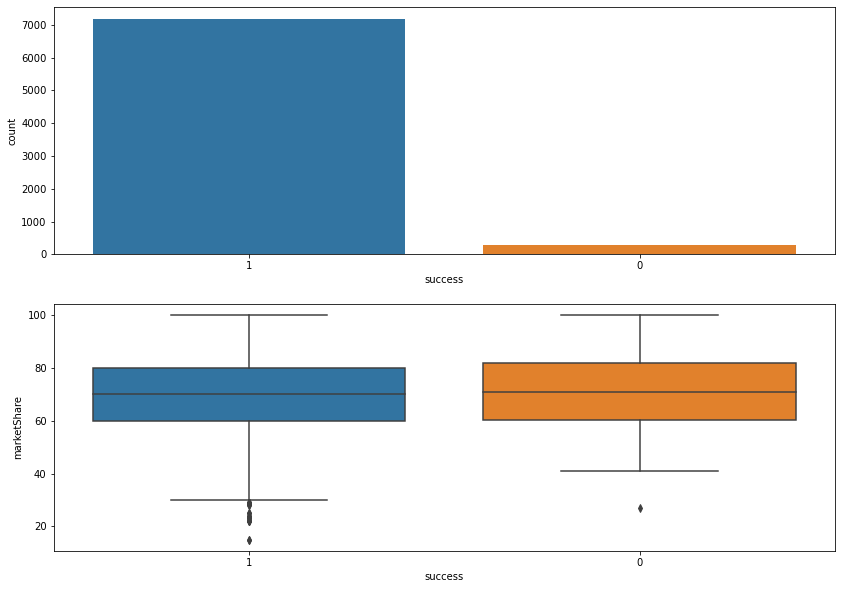

In [273]:
feature_plot(df, 'marketShare','success')

1    7179
0     274
Name: success, dtype: int64


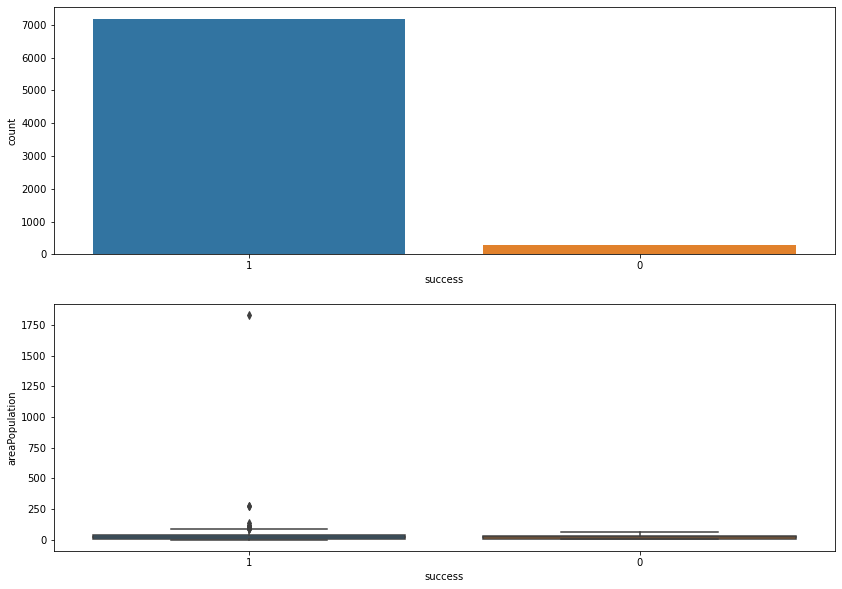

In [275]:
feature_plot(df, 'areaPopulation','success')

1    7179
0     274
Name: success, dtype: int64


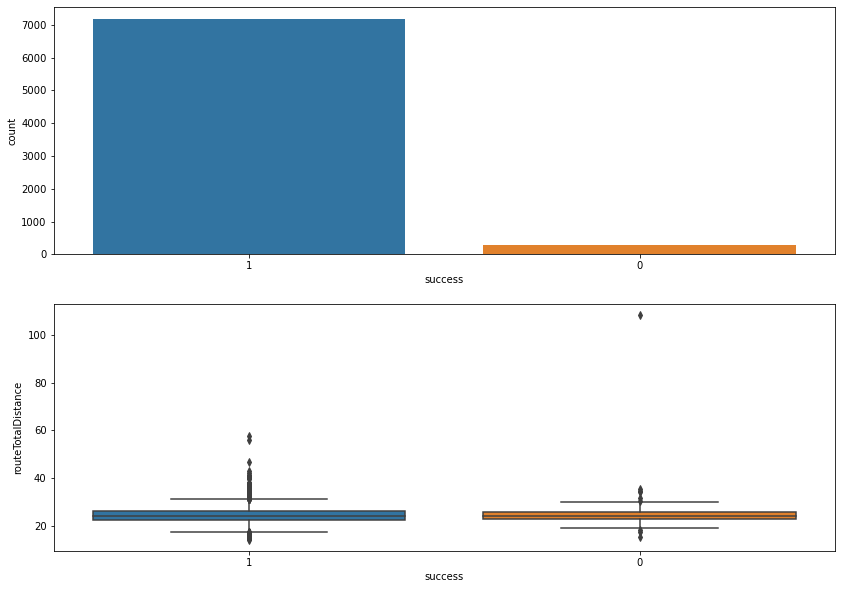

In [276]:
feature_plot(df, 'routeTotalDistance','success')

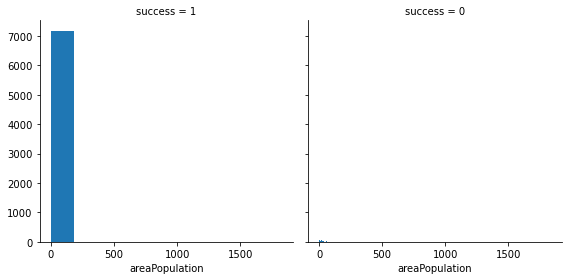

In [278]:
job = sns.FacetGrid(df, col='success', height=4)
job = job.map(plt.hist, 'areaPopulation', bins=10)

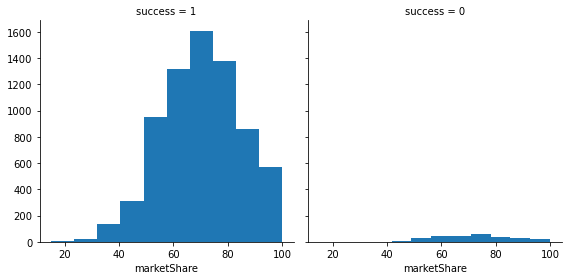

In [279]:
job = sns.FacetGrid(df, col='success', height=4)
job = job.map(plt.hist, 'marketShare', bins=10)

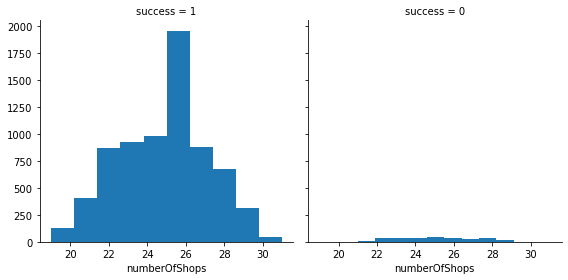

In [280]:
job = sns.FacetGrid(df, col='success', height=4)
job = job.map(plt.hist, 'numberOfShops', bins=10)

In [26]:
df

anonID  birthdate  routeDate  region gender areaWealthLevel  \
0     ROJV1008 1966-06-11 2020-05-19   LATAM      M             Mid   
1     WCXY2531 1989-01-11 2020-05-18   AMESA      M             Low   
2     BHKS5982 1981-11-15 2020-05-22   AMESA      M             Low   
3     BILI4412 1985-11-13 2020-05-13  Europe      M             Mid   
4     XZDO7282 1981-05-30 2020-05-18    APAC      M            High   
...        ...        ...        ...     ...    ...             ...   
7448  HNFJ4375 1965-05-02 2020-05-14   LATAM      M             Low   
7449  BOOL3595 1977-08-06 2020-11-05   AMESA      M             Low   
7450  CVCU2335 1984-04-15 2020-05-19   LATAM      M             Low   
7451  KPET2668 1969-04-30 2020-05-22   LATAM      M             Mid   
7452  CENS9763 1985-04-17 2020-11-05    APAC      M             Mid   

      areaPopulation badWeather weatherRestrictions  routeTotalDistance  \
0          36.250000         No                  No           24.296875   
1          75.875000         No                  No           22.296875   
2          59.093750         No                  No           25.500000   
3          44.656250         No                  No           20.500000   
4          20.453125         No                  No           24.406250   
...              ...        ...                 ...                 ...   
7448       40.062500         No                  No           27.593750   
7449        4.820312        Yes                  No           22.906250   
7450       83.187500         No                  No           40.187500   
7451        6.160156         No                  No           29.203125   
7452        6.750000         No                  No           22.906250   

      numberOfShops  marketShare  avgAreaBenefits  timeFromAvg advertising  \
0                24           39        15.812500    -0.180054           2   
1                24          100        20.843750    -0.029999           3   
2                29           92        16.109375     0.589844           2   
3                24           69        17.500000     0.569824           3   
4                26           77        17.796875     0.439941           0   
...             ...          ...              ...          ...         ...   
7448             21           58        26.328125     0.640137           3   
7449             26           50        26.343750     0.379883           0   
7450             26           93        17.875000     0.970215           2   
7451             23           73        13.367188    -0.300049           3   
7452             25           53        21.015625     0.290039           2   

     employeeLYScore employeeTenure employeePrevComps success  
0                  4              2                 1       1  
1                  5              2                 1       1  
2                  3              0                 1       1  
3                  4              2                 1       1  
4                  3              1                 2       1  
...              ...            ...               ...     ...  
7448               4              3                 3       1  
7449               3              2                 1       1  
7450               4              3                 2       1  
7451               3              3                 3       1  
7452               3              2                 2       1  

[7453 rows x 19 columns]

Its an imbalancd dataset

In [27]:
df.drop(['anonID','birthdate','routeDate'],axis=1,inplace=True)
df.head()

region gender areaWealthLevel  areaPopulation badWeather  \
0   LATAM      M             Mid       36.250000         No   
1   AMESA      M             Low       75.875000         No   
2   AMESA      M             Low       59.093750         No   
3  Europe      M             Mid       44.656250         No   
4    APAC      M            High       20.453125         No   

  weatherRestrictions  routeTotalDistance  numberOfShops  marketShare  \
0                  No           24.296875             24           39   
1                  No           22.296875             24          100   
2                  No           25.500000             29           92   
3                  No           20.500000             24           69   
4                  No           24.406250             26           77   

   avgAreaBenefits  timeFromAvg advertising employeeLYScore employeeTenure  \
0        15.812500    -0.180054           2               4              2   
1        20.843750    -0.029999           3               5              2   
2        16.109375     0.589844           2               3              0   
3        17.500000     0.569824           3               4              2   
4        17.796875     0.439941           0               3              1   

  employeePrevComps success  
0                 1       1  
1                 1       1  
2                 1       1  
3                 1       1  
4                 2       1

In [28]:
df.shape

(7453, 16)

In [29]:
df['region'] = df['region'].astype('category')
df['gender'] = df['gender'].astype('category')
df['areaWealthLevel'] = df['areaWealthLevel'].astype('category')
df['badWeather'] = df['badWeather'].astype('category')
df['weatherRestrictions'] = df['weatherRestrictions'].astype('category')
df['advertising'] = df['advertising'].astype('category')
df['employeeLYScore'] = df['employeeLYScore'].astype('category')
df['employeePrevComps'] = df['employeePrevComps'].astype('category')
df['employeeTenure'] = df['employeeTenure'].astype('category')
df['success'] = df['success'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7453 entries, 0 to 7452
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   region               7453 non-null   category
 1   gender               7453 non-null   category
 2   areaWealthLevel      7453 non-null   category
 3   areaPopulation       7453 non-null   float16 
 4   badWeather           7453 non-null   category
 5   weatherRestrictions  7453 non-null   category
 6   routeTotalDistance   7453 non-null   float16 
 7   numberOfShops        7453 non-null   int64   
 8   marketShare          7453 non-null   int64   
 9   avgAreaBenefits      7453 non-null   float16 
 10  timeFromAvg          7453 non-null   float16 
 11  advertising          7453 non-null   category
 12  employeeLYScore      7453 non-null   category
 13  employeeTenure       7453 non-null   category
 14  employeePrevComps    7453 non-null   category
 15  success              

In [30]:
categorical_cols = ['region','gender','areaWealthLevel', 'badWeather', 'weatherRestrictions','advertising',
                    'employeeLYScore','employeeTenure','employeePrevComps' ]
numerical_cols = ['areaPopulation', 'routeTotalDistance', 'numberOfShops','marketShare',
                  'avgAreaBenefits','timeFromAvg']

In [31]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [32]:
X_train

region gender areaWealthLevel  areaPopulation badWeather  \
3257    APAC      M             Low       33.312500         No   
151     APAC      M             Mid       68.875000         No   
5965    APAC      M             Low       39.687500         No   
2914   AMESA      M             Low        7.058594         No   
7140    APAC      M             Mid       11.421875         No   
...      ...    ...             ...             ...        ...   
4167    APAC      M             Low        5.878906        Yes   
1738    APAC      M             Mid        4.218750         No   
4488    APAC      M             Mid       10.351562         No   
1393   AMESA      M             Mid       64.750000         No   
1195  Europe      M            High       51.968750         No   

     weatherRestrictions  routeTotalDistance  numberOfShops  marketShare  \
3257                  No           19.500000             21           90   
151                   No           24.406250             27           76   
5965                  No           23.093750             21           79   
2914                  No           26.796875             25           89   
7140                  No           25.203125             27           49   
...                  ...                 ...            ...          ...   
4167                  No           20.500000             29           83   
1738                  No           25.406250             26           73   
4488                  No           21.703125             28           84   
1393                  No           25.093750             25           60   
1195                  No           21.296875             22           63   

      avgAreaBenefits  timeFromAvg advertising employeeLYScore employeeTenure  \
3257        18.546875     0.099976           3               4              3   
151         21.437500    -0.330078           3               4              3   
5965        19.437500     0.239990           1               4              2   
2914        13.609375    -0.260010           0               2              2   
7140        13.273438     0.270020           1               3              2   
...               ...          ...         ...             ...            ...   
4167        19.734375     0.340088           1               3              1   
1738        21.437500    -0.740234           1               3              0   
4488         7.910156    -0.389893           0               2              3   
1393        23.765625    -0.059998           3               4              3   
1195        21.578125    -0.479980           3               4              2   

     employeePrevComps  
3257                 2  
151                  1  
5965                 2  
2914                 2  
7140                 1  
...                ...  
4167                 2  
1738                 1  
4488                 2  
1393                 2  
1195                 2  

[5962 rows x 15 columns]

In [33]:
X_test

region gender areaWealthLevel  areaPopulation badWeather  \
5114    APAC      M             Low        9.609375         No   
1777   LATAM      M             Mid       62.750000         No   
5866   AMESA      F             Mid       54.812500         No   
6699   LATAM      M            High       37.187500         No   
1460   AMESA      M             Low       23.484375         No   
...      ...    ...             ...             ...        ...   
7414  Europe      M            High       14.390625         No   
3861   AMESA      M             Mid       32.343750         No   
521     APAC      M             Mid        4.488281         No   
427    LATAM      M             Mid       24.968750         No   
4639   LATAM      M             Mid        4.921875         No   

     weatherRestrictions  routeTotalDistance  numberOfShops  marketShare  \
5114                  No           25.703125             25           92   
1777                  No           23.203125             25           70   
5866                  No           24.093750             25           60   
6699                  No           24.500000             26           83   
1460                  No           24.000000             23           81   
...                  ...                 ...            ...          ...   
7414                  No           23.593750             28           87   
3861                  No           23.296875             28           70   
521                   No           24.906250             22           59   
427                   No           25.906250             26           75   
4639                  No           19.500000             25           73   

      avgAreaBenefits  timeFromAvg advertising employeeLYScore employeeTenure  \
5114         9.007812     0.700195           0               2              2   
1777        10.367188     0.569824           1               3              0   
5866        19.843750    -0.910156           3               4              3   
6699        21.125000     0.109985           2               3              2   
1460        17.625000     0.509766           3               3              3   
...               ...          ...         ...             ...            ...   
7414        19.156250    -0.080017           1               2              2   
3861        15.960938    -1.190430           2               3              2   
521         15.273438     0.379883           3               3              2   
427         11.437500     1.009766           0               4              2   
4639        27.031250     0.729980           3               3              3   

     employeePrevComps  
5114                 1  
1777                 2  
5866                 2  
6699                 1  
1460                 3  
...                ...  
7414                 1  
3861                 2  
521                  2  
427                  3  
4639                 2  

[1491 rows x 15 columns]

In [34]:
y_train

3257    1
151     1
5965    1
2914    1
7140    1
       ..
4167    1
1738    1
4488    1
1393    1
1195    1
Name: success, Length: 5962, dtype: category
Categories (2, object): ['0', '1']

In [35]:
y_test

5114    1
1777    0
5866    1
6699    1
1460    1
       ..
7414    1
3861    1
521     1
427     0
4639    1
Name: success, Length: 1491, dtype: category
Categories (2, object): ['0', '1']

In [36]:
standard_scaler = StandardScaler().fit(X_train[numerical_cols])

X_train[numerical_cols] = standard_scaler.transform(X_train[numerical_cols])

In [37]:
X_test[numerical_cols] = standard_scaler.transform(X_test[numerical_cols])

# One hot encoding for categorical variables

In [38]:
combined_df_raw = pd.concat([X_train, X_test])
combined_df = pd.get_dummies(combined_df_raw, columns=categorical_cols, drop_first=True)

X_train = combined_df[:len(X_train)]
X_test = combined_df[:len(X_test)]

In [39]:
X_train

areaPopulation  routeTotalDistance  numberOfShops  marketShare  \
3257        0.199893           -1.523987      -1.638017     1.351135   
151         1.320312            0.023233       0.957675     0.395248   
5965        0.400741           -0.390673      -1.638017     0.600081   
2914       -0.627253            0.777133       0.092444     1.282857   
7140       -0.489785            0.274533       0.957675    -1.448249   
...              ...                 ...            ...          ...   
4167       -0.664419           -1.208630       1.822906     0.873191   
1738       -0.716724            0.338590       0.525060     0.190415   
4488       -0.523506           -0.829216       1.390290     0.941469   
1393        1.190351            0.240041       0.092444    -0.697195   
1195        0.787670           -0.957330      -1.205402    -0.492362   

      avgAreaBenefits  timeFromAvg  region_APAC  region_Europe  region_LATAM  \
3257        -0.070326     0.164145            1              0             0   
151          0.242931    -0.638672            1              0             0   
5965         0.026191     0.425522            1              0             0   
2914        -0.605402    -0.507869            0              0             0   
7140        -0.641808     0.481580            1              0             0   
...               ...          ...          ...            ...           ...   
4167         0.058363     0.612382            1              0             0   
1738         0.242931    -1.404344            1              0             0   
4488        -1.223025    -0.750332            1              0             0   
1393         0.495229    -0.134490            0              0             0   
1195         0.258170    -0.918507            0              1             0   

      gender_M  ...  employeeLYScore_2  employeeLYScore_3  employeeLYScore_4  \
3257         1  ...                  0                  0                  1   
151          1  ...                  0                  0                  1   
5965         1  ...                  0                  0                  1   
2914         1  ...                  1                  0                  0   
7140         1  ...                  0                  1                  0   
...        ...  ...                ...                ...                ...   
4167         1  ...                  0                  1                  0   
1738         1  ...                  0                  1                  0   
4488         1  ...                  1                  0                  0   
1393         1  ...                  0                  0                  1   
1195         1  ...                  0                  0                  1   

      employeeLYScore_5  employeeTenure_1  employeeTenure_2  employeeTenure_3  \
3257                  0                 0                 0                 1   
151                   0                 0                 0                 1   
5965                  0                 0                 1                 0   
2914                  0                 0                 1                 0   
7140                  0                 0                 1                 0   
...                 ...               ...               ...               ...   
4167                  0                 1                 0                 0   
1738                  0                 0                 0                 0   
4488                  0                 0                 0                 1   
1393                  0                 0                 0                 1   
1195                  0                 0                 1                 0   

      employeePrevComps_1  employeePrevComps_2  employeePrevComps_3  
3257                    0                    1                    0  
151                     1                    0                    0  
5965                    0           

In [40]:
X_test

areaPopulation  routeTotalDistance  numberOfShops  marketShare  \
3257        0.199893           -1.523987      -1.638017     1.351135   
151         1.320312            0.023233       0.957675     0.395248   
5965        0.400741           -0.390673      -1.638017     0.600081   
2914       -0.627253            0.777133       0.092444     1.282857   
7140       -0.489785            0.274533       0.957675    -1.448249   
...              ...                 ...            ...          ...   
4118        0.820160            1.284660      -0.340171    -0.628917   
2298       -0.126486            0.146419       1.822906    -0.492362   
5665        1.012147           -1.617609      -1.205402     1.965633   
4785        0.304255            0.683511      -0.340171    -1.994470   
2400        1.377416            1.186111       0.525060     0.326970   

      avgAreaBenefits  timeFromAvg  region_APAC  region_Europe  region_LATAM  \
3257        -0.070326     0.164145            1              0             0   
151          0.242931    -0.638672            1              0             0   
5965         0.026191     0.425522            1              0             0   
2914        -0.605402    -0.507869            0              0             0   
7140        -0.641808     0.481580            1              0             0   
...               ...          ...          ...            ...           ...   
4118        -0.141444    -0.041160            0              0             0   
2298        -0.608789    -1.964014            0              0             1   
5665        -0.426761     0.294947            1              0             0   
4785        -0.322624     0.966505            0              1             0   
2400         1.753335     1.003878            0              1             0   

      gender_M  ...  employeeLYScore_2  employeeLYScore_3  employeeLYScore_4  \
3257         1  ...                  0                  0                  1   
151          1  ...                  0                  0                  1   
5965         1  ...                  0                  0                  1   
2914         1  ...                  1                  0                  0   
7140         1  ...                  0                  1                  0   
...        ...  ...                ...                ...                ...   
4118         1  ...                  0                  0                  1   
2298         1  ...                  0                  1                  0   
5665         1  ...                  0                  0                  1   
4785         1  ...                  0                  1                  0   
2400         1  ...                  0                  0                  0   

      employeeLYScore_5  employeeTenure_1  employeeTenure_2  employeeTenure_3  \
3257                  0                 0                 0                 1   
151                   0                 0                 0                 1   
5965                  0                 0                 1                 0   
2914                  0                 0                 1                 0   
7140                  0                 0                 1                 0   
...                 ...               ...               ...               ...   
4118                  0                 0                 0                 1   
2298                  0                 0                 0                 0   
5665                  0                 1                 0                 0   
4785                  0                 0                 0                 1   
2400                  1                 0                 0                 1   

      employeePrevComps_1  employeePrevComps_2  employeePrevComps_3  
3257                    0                    1                    0  
151                     1                    0                    0  
5965                    0           

# Standard Scaling

In [41]:
#conda install -c conda-forge imbalanced-learn

In [42]:
#!pip install imblearn

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE 

In [44]:
oversample = SMOTE()
X_train_balanced, y_train_balanced = oversample.fit_resample(X_train, y_train)

In [45]:
y_train_balanced.value_counts()

0    5736
1    5736
Name: success, dtype: int64

In [46]:
len(y_train_balanced)

11472

In [47]:
len(X_train_balanced)

11472

In [48]:
# mms = MinMaxScaler()
# X_scaled = pd.DataFrame(mms.fit_transform(X_train), columns = X_train.columns)
# X_test_scaled = pd.DataFrame(mms.transform(X_test), columns = X_test.columns)

# oversample = SMOTE()
# X_balanced, y_balanced = oversample.fit_sample(X_train, y_train)
# X_test_balanced, y_test_balanced = oversample.fit_sample(X_test, y_test)

In [49]:
#!pip install termcolor

In [50]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from termcolor import colored
import seaborn as sns
import os
import timeit
import warnings
from collections import defaultdict

In [51]:

def conf_matrix_heatmap(confusion_matrix):
    sns.heatmap(confusion_matrix, annot=True, cmap="Blues" ,fmt='')
    plt.tight_layout()
    plt.title('Confusion Matrix for Base Model for the test data', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')


    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.8 # Add 0.8 to the bottom
    t -= 0.8 # Subtract 0.8 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()




In [52]:
def random_forest_grid_search():
    # Creating a grid of different hyperparameters
    grid_params = {
        'n_estimators': [60],
        'criterion': ["gini"],
        'min_samples_split': [2, 4, 6, 10],
        'max_depth': [20, 25, 30],
        # 'max_leaf_nodes': [1, 5, 7, 10]
    }

    # random forest classifer
    clf = RandomForestClassifier()

    print("Searching for optimal parameters..............")

    # Building a 3 fold Cross-Validated GridSearchCV object
    grid_object = GridSearchCV(estimator=clf, param_grid=grid_params, cv=3)

    print("Training the data...............")

    # Fitting the grid to the training data
    grid_object.fit(X_train_balanced, y_train_balanced)

    # Extracting the best parameters
    print(grid_object.best_params_)

    # Extracting the best model
    rf_best = grid_object.best_estimator_
    print(rf_best)

    print(grid_object.best_score_)

In [53]:
len(y_train)

5962

In [54]:
len(X_train)

5962

In [55]:
len(X_test)

1491

In [56]:
len(y_test)

1491

In [127]:
# Random Forest
def random_forest_clf():
    print(colored("------Random Forest Classification-------", 'red'))
    # build classifier
    clf = RandomForestClassifier(criterion='entropy', max_depth=30, n_estimators=48, random_state=0)

    # start timer
    start_time = timeit.default_timer()

    print("Training the Random Forest Classifier.......")

    clf = clf.fit(X_train_balanced, y_train_balanced)

    # end timer
    print("The time difference is :", timeit.default_timer() - start_time)

    print("Predicting test data.......")

    '''features = clf.feature_importances_
    feature_cols = []
    # print feature importance
    for i, j in enumerate(features, 1):
        if j <= 0.0:
            feature_cols.append(i)
            print(i)
    new_train_x = train_x.copy()
    new_test_x = test_x.copy()
    for k in feature_cols:
        new_train_x.drop(new_train_x.columns[k], axis=1, inplace=True)
        new_test_x.drop(new_test_x.columns[k], axis=1, inplace=True)
    clf2 = RandomForestClassifier(n_estimators=240, random_state=0)
    clf2 = clf2.fit(new_train_x, train_Y)'''

    # predict test data
    pred_y = clf.predict(X_test)

    # analyse prediction
    c_matrix = confusion_matrix(y_test, pred_y)  # confusion matrix
    error = zero_one_loss(y_test, pred_y)  # error
    score = accuracy_score(y_test, pred_y)  # accuracy score

    print('Confusion Matrix\n---------------------------\n', c_matrix)
    print('---------------------------')
    print("Error: {:.4f}%".format(error * 100))
    print("Accuracy Score: {:.4f}%".format(score * 100))
    print(classification_report(y_test, pred_y))
    print('accuracy:', c_matrix.diagonal() / c_matrix.sum(axis=1))
    
    # Calculating the predicted probabilities for the test data
    y_probs_test = clf.predict_proba(X_test)
    
    # Generating the confusion matrix and classification report for test data
    conf_matrix_grid_test = metrics.confusion_matrix(y_test, pred_y)
    clf_report_grid_test = metrics.classification_report(y_test, pred_y)

    # Calculating the ROC AUC score for Random forest base model
    roc_auc_rf_base = metrics.roc_auc_score(y_test, y_probs_test[:,1])
    print('\n\n\n  ROC/AUC values for the Random Forest classifier : ',roc_auc_rf_base)


    # Plot non-normalized confusion matrix
    conf_matrix_heatmap(c_matrix)

------Random Forest Classification-------
Training the Random Forest Classifier.......
The time difference is : 0.725215197000125
Predicting test data.......
Confusion Matrix
---------------------------
 [[   3   45]
 [  55 1388]]
---------------------------
Error: 6.7069%
Accuracy Score: 93.2931%
              precision    recall  f1-score   support

           0       0.05      0.06      0.06        48
           1       0.97      0.96      0.97      1443

    accuracy                           0.93      1491
   macro avg       0.51      0.51      0.51      1491
weighted avg       0.94      0.93      0.94      1491

accuracy: [0.0625     0.96188496]



  ROC/AUC values for the Random Forest classifier :  0.5091678216678217


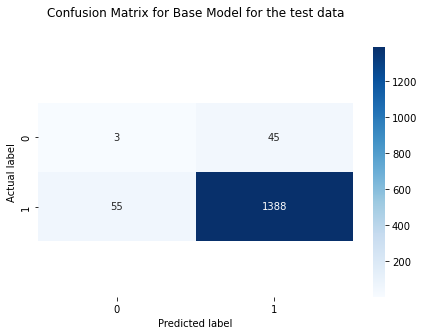

In [128]:
random_forest_clf()

In [292]:
# Hyperparameter tuning for KNN
def knn_grid_search():
    # parameters
    grid_params = {
        'n_neighbors': [2, 5, 7, 10, 12],
        'leaf_size': [10, 20, 30, 50, 100]
    }

    # KNN classifier
    clf = KNeighborsClassifier(n_jobs=-1)

    print("Searching for optimal parameters..............")

    # Building a 3 fold Cross-Validated GridSearchCV object
    grid_object = GridSearchCV(estimator=clf, param_grid=grid_params, cv=10)

    print("Training the data...............")

    # Fitting the grid to the training data
    grid_object.fit(X_train_balanced, y_train_balanced)

    # Extracting the best parameters
    print(grid_object.best_params_)

    # Extracting the best model
    rf_best = grid_object.best_estimator_
    print(rf_best)

In [291]:
# Find best K value in KNN
def find_k():
    # find value for parameter n_neighbors value between 1 to 20 where accuracy is higher
    for i in range(1, 21):
        # KNN classifier
        clf_knn = KNeighborsClassifier(n_neighbors=i)

        # train data
        clf_knn = clf_knn.fit(X_train_balanced, y_train_balanced)

        # predict
        pred_y = clf_knn.predict(X_test)

        print('accuracy for k value ', i, ': ', accuracy_score(test_Y, pred_y))


In [141]:
# KNN classifier
def knn_clf():
    print(colored("------KNN Classification-------", 'red'))

    # KNN classifier
    clf_knn = KNeighborsClassifier(n_neighbors=7)  # using 7 because it has higher accuray rate

    # start timer
    starttime = timeit.default_timer()

    print("Training the KNN Classifier.......")

    # Train model
    clf_knn = clf_knn.fit(X_train_balanced, y_train_balanced)

    print("The time difference is :", timeit.default_timer() - starttime)

    print("Predicting test data.......")

    # predict
    pred_y = clf_knn.predict(X_test)

    # analyse results
    c_matrix = confusion_matrix(y_test, pred_y)  # confusion matrix
    error = zero_one_loss(y_test, pred_y)  # error
    score = accuracy_score(y_test, pred_y)

    # display results
    print('Confusion Matrix\n---------------------------\n', c_matrix)
    print('---------------------------')
    print("Error: {:.4f}%".format(error * 100))
    print("Accuracy Score: {:.4f}%".format(score * 100))
    print(classification_report(y_test, pred_y))
    print('accuracy: ', c_matrix.diagonal() / c_matrix.sum(axis=1))
    
    
    # Calculating the predicted probabilities for the test data
    y_probs_test = clf_knn.predict_proba(X_test)
    
    # Generating the confusion matrix and classification report for test data
    conf_matrix_grid_test = metrics.confusion_matrix(y_test, pred_y)
    clf_report_grid_test = metrics.classification_report(y_test, pred_y)

    # Calculating the ROC AUC score for KNN classifier model
    roc_auc_knn = metrics.roc_auc_score(y_test, y_probs_test[:,1])
    print('\n\n\n  ROC/AUC values for KNN classifier : ',roc_auc_knn)

    # Plot non-normalized confusion matrix
    conf_matrix_heatmap(c_matrix)

------KNN Classification-------
Training the KNN Classifier.......
The time difference is : 0.01467297499993947
Predicting test data.......
Confusion Matrix
---------------------------
 [[  12   36]
 [ 254 1189]]
---------------------------
Error: 19.4500%
Accuracy Score: 80.5500%
              precision    recall  f1-score   support

           0       0.05      0.25      0.08        48
           1       0.97      0.82      0.89      1443

    accuracy                           0.81      1491
   macro avg       0.51      0.54      0.48      1491
weighted avg       0.94      0.81      0.87      1491

accuracy:  [0.25       0.82397782]



  ROC/AUC values for KNN classifier :  0.5083954146454147


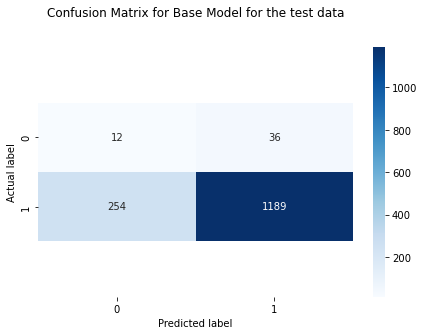

In [142]:
knn_clf()

In [143]:
# SVM classification
def svc_grid_search():
    # Creating a grid of different hyperparameters
    grid_params = {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
        'gamma': ['scale', 'auto']
    }

    # SVC estimator
    clf = SVC(random_state=0)

    print("Searching for optimal parameters..............")

    # Building a 3 fold Cross-Validated GridSearchCV object
    grid_object = GridSearchCV(estimator=clf, param_grid=grid_params, cv=10)

    print("Training the data...............")

    # Fitting the grid to the training data
    grid_object.fit(X_train_balanced, y_train_balanced)

    # Extracting the best parameters
    print(grid_object.best_params_)

    # Extracting the best model
    rf_best = grid_object.best_estimator_
    print("Best Parameters are:\n", rf_best)

In [146]:
# SVC
def svm_clf():
    print(colored("------SVM Classification-------", 'red'))
    # build classifier
    clf_svc = SVC(kernel='poly', degree=1, C=3)  # using poly for kernel

    # start timer
    starttime = timeit.default_timer()

    print("Training the SVM Classifier.......")

    # train SVC
    clf_svc = clf_svc.fit(X_train_balanced, y_train_balanced)

    print("The time difference is :", timeit.default_timer() - starttime)

    print("Predicting test data.......")

    # predict
    pred_y = clf_svc.predict(X_test)

    # anlayse results
    c_matrix = confusion_matrix(y_test, pred_y)
    error = zero_one_loss(y_test, pred_y)
    score = accuracy_score(y_test, pred_y)

    # display results
    print('Confusion Matrix\n---------------------------\n', c_matrix)
    print('---------------------------')
    print("Error: {:.4f}%".format(error * 100))
    print("Accuracy Score: {:.4f}%".format(score * 100))
    print(classification_report(y_test, pred_y))
    print('accuracy: ', c_matrix.diagonal() / c_matrix.sum(axis=1))
    
    # Plot non-normalized confusion matrix
    conf_matrix_heatmap(c_matrix)


------SVM Classification-------
Training the SVM Classifier.......
The time difference is : 3.1540590109998448
Predicting test data.......
Confusion Matrix
---------------------------
 [[   7   41]
 [ 188 1255]]
---------------------------
Error: 15.3588%
Accuracy Score: 84.6412%
              precision    recall  f1-score   support

           0       0.04      0.15      0.06        48
           1       0.97      0.87      0.92      1443

    accuracy                           0.85      1491
   macro avg       0.50      0.51      0.49      1491
weighted avg       0.94      0.85      0.89      1491

accuracy:  [0.14583333 0.86971587]


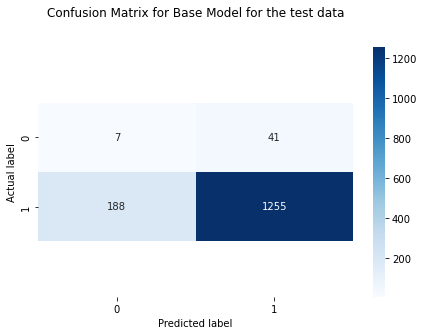

In [147]:
svm_clf()

In [149]:
# logistic regression hyperparameter tuning
def logistic_reg_grid_search():
    # Creating a grid of different hyperparameters
    grid_params = {
        'penalty': ['l1', 'l2'],
        'max_iter': [100, 200, 300, 500, 800, 1000]
    }

    # logistic regression classifier
    clf = LogisticRegression(random_state=0)

    print("Searching for optimal parameters..............")

    # Building a 10 fold Cross-Validated GridSearchCV object
    grid_object = GridSearchCV(estimator=clf, param_grid=grid_params, cv=10)

    print("Training the model...............")

    # Fitting the grid to the training data
    grid_object.fit(X_train_balanced, y_train_balanced)

    # Extracting the best parameters
    print(grid_object.best_params_)

    # Extracting the best model
    rf_best = grid_object.best_estimator_
    print(rf_best)


In [151]:
# Logistic Regression
def logistic_reg_clf():
    print(colored("------Logistic Regression Classification-------", 'red'))
    # logistic regression classifier
    clf_lr = LogisticRegression(C=1e5, random_state=0)

    # start timer
    starttime = timeit.default_timer()

    print("Training the Logistic Regression Classifier.......")

    # train the model
    clf_lr = clf_lr.fit(X_train_balanced, y_train_balanced)

    print("The time difference is :", timeit.default_timer() - starttime)

    print("Predicting test data.......")

    # predict
    pred_y = clf_lr.predict(X_test)

    # get results
    c_matrix = confusion_matrix(y_test, pred_y)
    error = zero_one_loss(y_test, pred_y)
    score = accuracy_score(y_test, pred_y)

    # display results
    print('Confusion Matrix\n---------------------------\n', c_matrix)
    print('---------------------------')
    print("Error: {:.4f}%".format(error * 100))
    print("Accuracy Score: {:.4f}%".format(score * 100))
    print(classification_report(y_test, pred_y))
    print('accuracy: ', c_matrix.diagonal() / c_matrix.sum(axis=1))
    
    # Calculating the predicted probabilities for the test data
    y_probs_test = clf_lr.predict_proba(X_test)
    
    # Generating the confusion matrix and classification report for test data
    conf_matrix_grid_test = metrics.confusion_matrix(y_test, pred_y)
    clf_report_grid_test = metrics.classification_report(y_test, pred_y)

    # Calculating the ROC AUC score for Logistic regression classifier model
    roc_auc_lr = metrics.roc_auc_score(y_test, y_probs_test[:,1])
    print('\n\n\n  ROC/AUC values for Logistic regression classifier : ',roc_auc_lr)

    # Plot non-normalized confusion matrix
    conf_matrix_heatmap(c_matrix)

------Logistic Regression Classification-------
Training the Logistic Regression Classifier.......
The time difference is : 0.10368507100019997
Predicting test data.......
Confusion Matrix
---------------------------
 [[   7   41]
 [ 185 1258]]
---------------------------
Error: 15.1576%
Accuracy Score: 84.8424%
              precision    recall  f1-score   support

           0       0.04      0.15      0.06        48
           1       0.97      0.87      0.92      1443

    accuracy                           0.85      1491
   macro avg       0.50      0.51      0.49      1491
weighted avg       0.94      0.85      0.89      1491

accuracy:  [0.14583333 0.87179487]



  ROC/AUC values for Logistic regression classifier :  0.49517787017787024


/Users/mohammedhussain/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


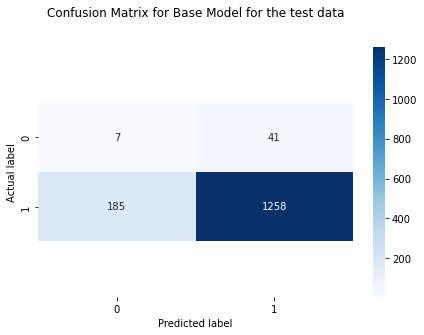

In [152]:
logistic_reg_clf()

In [154]:
# hyperparameter tuning for SGD
def sgd_grid_search():
    # Creating a grid of different hyperparameters
    grid_params = {
        'loss': ['hinge', 'log'],
        'penalty': ['l2', 'l1'],
        'max_iter': [100, 200, 300, 400, 500],
        'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']
    }

    # SGD classifier
    clf = SGDClassifier(random_state=0)

    print("Searching for optimal parameters..............")

    # Building a 10 fold Cross-Validated GridSearchCV object
    grid_object = GridSearchCV(estimator=clf, param_grid=grid_params, cv=10)

    print("Training the model...............")

    # Fitting the grid to the training data
    grid_object.fit(X_train_balanced, y_train_balanced)

    # Extracting the best parameters
    print(grid_object.best_params_)

    # Extracting the best model
    rf_best = grid_object.best_estimator_
    print(rf_best)

In [156]:
# SGD classification
def sgd_clf():
    print(colored("------SGD Classification-------", 'red'))
    # build classifier
    clf_sgd = SGDClassifier(loss="hinge", penalty="l1", max_iter=200, alpha=0.001, random_state=0)

    # start timer
    starttime = timeit.default_timer()

    print("Training the SGD Classifier.......")

    # train model
    clf_sgd = clf_sgd.fit(X_train_balanced, y_train_balanced)

    print("The time difference is :", timeit.default_timer() - starttime)

    print("Predicting test data.......")

    # predict
    pred_y = clf_sgd.predict(X_test)

    c_matrix = confusion_matrix(y_test, pred_y)
    error = zero_one_loss(y_test, pred_y)
    score = accuracy_score(y_test, pred_y)

    print('Confusion Matrix\n---------------------------\n', c_matrix)
    print('---------------------------')
    print("Error: {:.4f}%".format(error * 100))
    print("Accuracy Score: {:.4f}%".format(score * 100))
    print(classification_report(y_test, pred_y))
    print('accuracy: ', c_matrix.diagonal() / c_matrix.sum(axis=1))
    

    # Plot non-normalized confusion matrix
    conf_matrix_heatmap(c_matrix)

------SGD Classification-------
Training the SGD Classifier.......
The time difference is : 0.04745192499967743
Predicting test data.......
Confusion Matrix
---------------------------
 [[   8   40]
 [ 198 1245]]
---------------------------
Error: 15.9624%
Accuracy Score: 84.0376%
              precision    recall  f1-score   support

           0       0.04      0.17      0.06        48
           1       0.97      0.86      0.91      1443

    accuracy                           0.84      1491
   macro avg       0.50      0.51      0.49      1491
weighted avg       0.94      0.84      0.89      1491

accuracy:  [0.16666667 0.86278586]


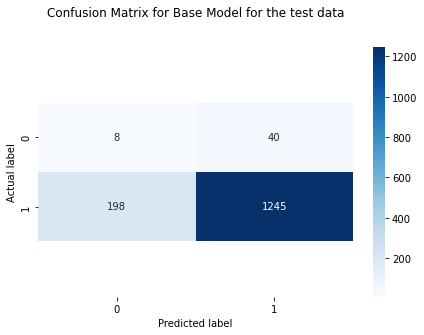

In [157]:
sgd_clf()

In [158]:
# AdaBoost Grid Search
def adaboost_grid_search():
    # Creating a grid of different hyperparameters
    grid_params = {
        'n_estimators': [20, 50, 100, 200, 500, 800],
        'learning_rate': [0.05, 0.8, 1]
    }

    # Adaboost classifier
    clf = AdaBoostClassifier(random_state=0)

    print("Searching for optimal parameters..............")

    # Building a 10 fold Cross-Validated GridSearchCV object
    grid_object = GridSearchCV(estimator=clf, param_grid=grid_params, cv=10)

    print("Training the model...............")

    # Fitting the grid to the training data
    grid_object.fit(X_train_balanced, y_train_balanced)

    # Extracting the best parameters
    print(grid_object.best_params_)

    # Extracting the best model=
    rf_best = grid_object.best_estimator_
    print(rf_best)

In [159]:
# adaboost
def adaboost_clf():
    print(colored("------Adaboost Classification-------", 'red'))
    # define classifier
    clf_abc = AdaBoostClassifier(n_estimators=15, learning_rate=1)

    # time it
    starttime = timeit.default_timer()

    print("Training the Adaboost Classifier.......")

    # fit data
    clf_abc.fit(X_train_balanced, y_train_balanced)

    print("The time difference is :", timeit.default_timer() - starttime)

    print("Predicting test data.......")

    # predict
    pred_y = clf_abc.predict(X_test)

    # results
    c_matrix = confusion_matrix(y_test, pred_y)
    error = zero_one_loss(y_test, pred_y)
    score = accuracy_score(y_test, pred_y)

    # display results
    print('Confusion Matrix\n---------------------------\n', c_matrix)
    print('---------------------------')
    print("Error: {:.4f}%".format(error * 100))
    print("Accuracy Score: {:.4f}%".format(score * 100))
    print(classification_report(y_test, pred_y))
    print('accuracy: ', c_matrix.diagonal() / c_matrix.sum(axis=1))
    
        # Calculating the predicted probabilities for the test data
    y_probs_test = clf_abc.predict_proba(X_test)
    
    # Generating the confusion matrix and classification report for test data
    conf_matrix_grid_test = metrics.confusion_matrix(y_test, pred_y)
    clf_report_grid_test = metrics.classification_report(y_test, pred_y)

    # Calculating the ROC AUC score for the ADAboost classifier model
    roc_auc_adaboost = metrics.roc_auc_score(y_test, y_probs_test[:,1])
    print('\n\n\n  ROC/AUC values for ADAboost classifier : ',roc_auc_adaboost)

    

    # Plot non-normalized confusion matrix
    conf_matrix_heatmap(c_matrix)



------Adaboost Classification-------
Training the Adaboost Classifier.......
The time difference is : 0.27843257599988647
Predicting test data.......
Confusion Matrix
---------------------------
 [[   9   39]
 [ 263 1180]]
---------------------------
Error: 20.2549%
Accuracy Score: 79.7451%
              precision    recall  f1-score   support

           0       0.03      0.19      0.06        48
           1       0.97      0.82      0.89      1443

    accuracy                           0.80      1491
   macro avg       0.50      0.50      0.47      1491
weighted avg       0.94      0.80      0.86      1491

accuracy:  [0.1875     0.81774082]



  ROC/AUC values for ADAboost classifier :  0.4952572765072766


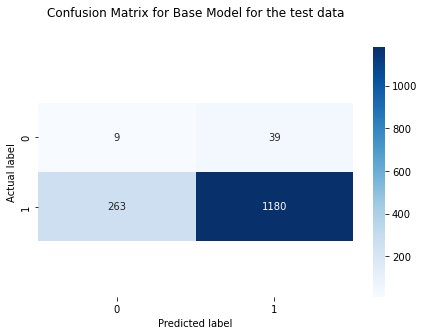

In [160]:
adaboost_clf()

In [ ]:
The Random Forest model turned out to be the winner in terms of the accuracy and also AUC/ROC vlaues

In [200]:

    # Creating a grid of different hyperparameters
grid_params = {
        'n_estimators': [60],
        'criterion': ["gini"],
        'min_samples_split': [2, 4, 6, 10],
        'max_depth': [20, 25, 30],
        # 'max_leaf_nodes': [1, 5, 7, 10]
}

    # random forest classifer
clf = RandomForestClassifier()

print("Searching for optimal parameters..............")

    # Building a 3 fold Cross-Validated GridSearchCV object
grid_object = GridSearchCV(estimator=clf, param_grid=grid_params, cv=3)

print("Training the data...............")

# Fitting the grid to the training data
grid_object.fit(X_train_balanced, y_train_balanced)

# Extracting the best parameters
print(grid_object.best_params_)

# Extracting the best model
rf_best = grid_object.best_estimator_
print(rf_best)

print(grid_object.best_score_)

Searching for optimal parameters..............
Training the data...............
{'criterion': 'gini', 'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 60}
RandomForestClassifier(max_depth=30, n_estimators=60)
0.9754184100418412


In [217]:
final_test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5878 entries, 0 to 5877
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   anonID               5878 non-null   object
 1   birthdate            5878 non-null   object
 2   routeDate            5878 non-null   object
 3   region               5878 non-null   object
 4   gender               5878 non-null   object
 5   areaWealthLevel      5878 non-null   object
 6   areaPopulation       5878 non-null   object
 7   badWeather           5878 non-null   object
 8   weatherRestrictions  5878 non-null   object
 9   routeTotalDistance   5878 non-null   object
 10  numberOfShops        5878 non-null   object
 11  marketShare          5878 non-null   object
 12  avgAreaBenefits      5878 non-null   object
 13  timeFromAvg          5878 non-null   object
 14  advertising          5878 non-null   object
 15  employeeLYScore      5878 non-null   object
 16  employ

In [218]:
test_data_anonid = final_test_dataset['anonID']
test_data_anonid

0       XLKC1691
1       KANY6459
2       YCOG1417
3       LRDT1582
4       NVNN3276
          ...   
5873    PNQA6061
5874    XNSX3943
5875    FSXY6357
5876    XXFW2494
5877    PWRV6448
Name: anonID, Length: 5878, dtype: object

In [219]:
final_test_dataset.drop(['anonID','birthdate','routeDate','success'],axis=1,inplace=True)

/Users/mohammedhussain/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [220]:

final_test_dataset

region gender areaWealthLevel areaPopulation badWeather  \
0         NA      M             Mid          30.66         No   
1      LATAM      M             Mid           52.5         No   
2      AMESA      M             Mid          46.58         No   
3       APAC      M             Mid            5.2         No   
4     Europe      M             Mid            5.2         No   
...      ...    ...             ...            ...        ...   
5873  Europe      M             Low          24.36         No   
5874   AMESA      M             Low           4.07         No   
5875      NA      M             Mid          45.12         No   
5876   AMESA      M            High          23.63         No   
5877  Europe      M             Mid           9.56         No   

     weatherRestrictions routeTotalDistance numberOfShops marketShare  \
0                     No               28.3            26          49   
1                     No               21.3            28          96   
2                     No               31.9            23          71   
3                     No               25.1            27          79   
4                     No               26.4            26          67   
...                  ...                ...           ...         ...   
5873                  No               23.3            24          75   
5874                  No               26.7            26          64   
5875                  No                 24            25          78   
5876                  No               23.8            22          75   
5877                  No               27.1            27          54   

     avgAreaBenefits timeFromAvg advertising employeeLYScore employeeTenure  \
0               18.9        0.35           3               4              1   
1              14.28        0.47           3               4              3   
2              18.67        0.02           3               4              3   
3              14.99       -0.07           3               3              2   
4              21.71         0.3           3               4              1   
...              ...         ...         ...             ...            ...   
5873            10.5          NA           2               3              3   
5874           53.28       -1.01           3               3              2   
5875           14.37       -0.57           1               3              0   
5876           16.85          NA           1               3              1   
5877            11.5        0.88           0               2              3   

     employeePrevComps  
0                    1  
1                    2  
2                    2  
3                    1  
4                    2  
...                ...  
5873                 2  
5874                 1  
5875                 1  
5876                 1  
5877                 2  

[5878 rows x 15 columns]

In [231]:
final_test_dataset = final_test_dataset.replace('NA', np.nan)


/var/folders/ww/xnr7gw5521g7580yywk75pv00000gn/T/ipykernel_16419/3234769822.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  final_test_dataset[numerical_cols]=final_test_dataset[numerical_cols].fillna(final_test_dataset.mean().iloc[0])


In [229]:
final_test_dataset[numerical_cols] = final_test_dataset[numerical_cols].replace(np.inf, np.nan)

In [240]:
final_test_dataset['numberOfShops'] = final_test_dataset['numberOfShops'].astype('int')
final_test_dataset['areaPopulation'] = final_test_dataset['areaPopulation'].astype('int')
final_test_dataset['avgAreaBenefits'] = final_test_dataset['avgAreaBenefits'].astype('int')
final_test_dataset['timeFromAvg'] = final_test_dataset['timeFromAvg'].astype('int')
final_test_dataset['routeTotalDistance'] = final_test_dataset['routeTotalDistance'].astype('int')
final_test_dataset['marketShare'] = final_test_dataset['marketShare'].astype('int')

In [223]:
final_test_dataset['region'] = final_test_dataset['region'].astype('category')
final_test_dataset['gender'] = final_test_dataset['gender'].astype('category')
final_test_dataset['areaWealthLevel'] = final_test_dataset['areaWealthLevel'].astype('category')
final_test_dataset['badWeather'] = final_test_dataset['badWeather'].astype('category')
final_test_dataset['weatherRestrictions'] = final_test_dataset['weatherRestrictions'].astype('category')
final_test_dataset['advertising'] = final_test_dataset['advertising'].astype('category')
final_test_dataset['employeeLYScore'] = final_test_dataset['employeeLYScore'].astype('category')
final_test_dataset['employeePrevComps'] = final_test_dataset['employeePrevComps'].astype('category')
final_test_dataset['employeeTenure'] = final_test_dataset['employeeTenure'].astype('category')
final_test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5878 entries, 0 to 5877
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   region               4095 non-null   category
 1   gender               5878 non-null   category
 2   areaWealthLevel      5339 non-null   category
 3   areaPopulation       5878 non-null   float16 
 4   badWeather           5878 non-null   category
 5   weatherRestrictions  5878 non-null   category
 6   routeTotalDistance   5878 non-null   float16 
 7   numberOfShops        5878 non-null   int64   
 8   marketShare          5878 non-null   int64   
 9   avgAreaBenefits      5878 non-null   float16 
 10  timeFromAvg          3533 non-null   float16 
 11  advertising          5878 non-null   category
 12  employeeLYScore      5878 non-null   category
 13  employeeTenure       5878 non-null   category
 14  employeePrevComps    5878 non-null   category
dtypes: category(9), float

In [232]:
final_test_dataset[numerical_cols]=final_test_dataset[numerical_cols].fillna(final_test_dataset.mean().iloc[0])

standard_scaler = StandardScaler().fit(final_test_dataset[numerical_cols])

final_test_dataset[numerical_cols] = standard_scaler.transform(final_test_dataset[numerical_cols])

/var/folders/ww/xnr7gw5521g7580yywk75pv00000gn/T/ipykernel_16419/4204494869.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  final_test_dataset[numerical_cols]=final_test_dataset[numerical_cols].fillna(final_test_dataset.mean().iloc[0])


In [233]:
final_test_dataset

region gender areaWealthLevel  areaPopulation badWeather  \
0        NaN      M             Mid        0.166521         No   
1      LATAM      M             Mid        1.211906         No   
2      AMESA      M             Mid        0.926801         No   
3       APAC      M             Mid       -1.021416         No   
4     Europe      M             Mid       -1.021416         No   
...      ...    ...             ...             ...        ...   
5873  Europe      M             Low       -0.118584         No   
5874   AMESA      M             Low       -1.068934         No   
5875     NaN      M             Mid        0.879284         No   
5876   AMESA      M            High       -0.166101         No   
5877  Europe      M             Mid       -0.831346         No   

     weatherRestrictions  routeTotalDistance  numberOfShops  marketShare  \
0                     No            1.262315       0.511359    -1.421706   
1                     No           -0.970520       1.372733     1.796552   
2                     No            2.413620      -0.780703     0.084712   
3                     No            0.240594       0.942046     0.632501   
4                     No            0.659250       0.511359    -0.189182   
...                  ...                 ...            ...          ...   
5873                  No           -0.332567      -0.350016     0.358607   
5874                  No            0.753946       0.511359    -0.394602   
5875                  No           -0.108287       0.080671     0.564027   
5876                  No           -0.173079      -1.211390     0.358607   
5877                  No            0.878546       0.942046    -1.079338   

      avgAreaBenefits  timeFromAvg advertising employeeLYScore employeeTenure  \
0           -0.084144    -0.787619           3               4              1   
1           -0.531642    -0.778385           3               4              3   
2           -0.084144    -0.813048           3               4              3   
3           -0.531642    -0.819981           3               3              2   
4            0.251480    -0.791475           3               4              1   
...               ...          ...         ...             ...            ...   
5873        -0.979140     1.226787           2               3              3   
5874         3.831466    -0.892374           3               3              2   
5875        -0.531642    -0.858484           1               3              0   
5876        -0.307893     1.226787           1               3              1   
5877        -0.867266    -0.746808           0               2              3   

     employeePrevComps  
0                    1  
1                    2  
2                    2  
3                    1  
4                    2  
...                ...  
5873                 2  
5874                 1  
5875                 1  
5876                 1  
5877                 2  

[5878 rows x 15 columns]

In [234]:
final_test_dataset = pd.get_dummies(final_test_dataset, columns=categorical_cols, drop_first=True)
final_test_dataset

areaPopulation  routeTotalDistance  numberOfShops  marketShare  \
0           0.166521            1.262315       0.511359    -1.421706   
1           1.211906           -0.970520       1.372733     1.796552   
2           0.926801            2.413620      -0.780703     0.084712   
3          -1.021416            0.240594       0.942046     0.632501   
4          -1.021416            0.659250       0.511359    -0.189182   
...              ...                 ...            ...          ...   
5873       -0.118584           -0.332567      -0.350016     0.358607   
5874       -1.068934            0.753946       0.511359    -0.394602   
5875        0.879284           -0.108287       0.080671     0.564027   
5876       -0.166101           -0.173079      -1.211390     0.358607   
5877       -0.831346            0.878546       0.942046    -1.079338   

      avgAreaBenefits  timeFromAvg  region_APAC  region_Europe  region_LATAM  \
0           -0.084144    -0.787619            0              0             0   
1           -0.531642    -0.778385            0              0             1   
2           -0.084144    -0.813048            0              0             0   
3           -0.531642    -0.819981            1              0             0   
4            0.251480    -0.791475            0              1             0   
...               ...          ...          ...            ...           ...   
5873        -0.979140     1.226787            0              1             0   
5874         3.831466    -0.892374            0              0             0   
5875        -0.531642    -0.858484            0              0             0   
5876        -0.307893     1.226787            0              0             0   
5877        -0.867266    -0.746808            0              1             0   

      gender_M  ...  employeeLYScore_2  employeeLYScore_3  employeeLYScore_4  \
0            1  ...                  0                  0                  1   
1            1  ...                  0                  0                  1   
2            1  ...                  0                  0                  1   
3            1  ...                  0                  1                  0   
4            1  ...                  0                  0                  1   
...        ...  ...                ...                ...                ...   
5873         1  ...                  0                  1                  0   
5874         1  ...                  0                  1                  0   
5875         1  ...                  0                  1                  0   
5876         1  ...                  0                  1                  0   
5877         1  ...                  1                  0                  0   

      employeeLYScore_5  employeeTenure_1  employeeTenure_2  employeeTenure_3  \
0                     0                 1                 0                 0   
1                     0                 0                 0                 1   
2                     0                 0                 0                 1   
3                     0                 0                 1                 0   
4                     0                 1                 0                 0   
...                 ...               ...               ...               ...   
5873                  0                 0                 0                 1   
5874                  0                 0                 1                 0   
5875                  0                 0                 0                 0   
5876                  0                 1                 0                 0   
5877                  0                 0                 0                 1   

      employeePrevComps_1  employeePrevComps_2  employeePrevComps_3  
0                       1                    0                    0  
1                       0                    1                    0  
2                       0           

In [235]:
print(colored("------Random Forest Classification-------", 'red'))
    # build classifier
clf = RandomForestClassifier(criterion='entropy', max_depth=30, n_estimators=48, random_state=0)

# start timer
start_time = timeit.default_timer()

print("Training the Random Forest Classifier.......")

clf = clf.fit(X_train_balanced, y_train_balanced)

# end timer
print("The time difference is :", timeit.default_timer() - start_time)

print("Predicting test data.......")

 

# predict o the final test data
pred_success = clf.predict(final_test_dataset)


------Random Forest Classification-------
Training the Random Forest Classifier.......
The time difference is : 0.7262312949987972
Predicting test data.......


In [238]:
len(pred_success)

5878

In [239]:
len(final_test_dataset)

5878

In [242]:
final_df = pd.DataFrame(test_data_anonid,columns = ['anonID'] )
final_df

anonID
0     XLKC1691
1     KANY6459
2     YCOG1417
3     LRDT1582
4     NVNN3276
...        ...
5873  PNQA6061
5874  XNSX3943
5875  FSXY6357
5876  XXFW2494
5877  PWRV6448

[5878 rows x 1 columns]

In [244]:
pred_success = pd.DataFrame(pred_success)
pred_success

0
0     1
1     1
2     1
3     1
4     1
...  ..
5873  1
5874  1
5875  0
5876  1
5877  1

[5878 rows x 1 columns]

In [245]:
final_df['success'] = pred_success
final_df

anonID success
0     XLKC1691       1
1     KANY6459       1
2     YCOG1417       1
3     LRDT1582       1
4     NVNN3276       1
...        ...     ...
5873  PNQA6061       1
5874  XNSX3943       1
5875  FSXY6357       0
5876  XXFW2494       1
5877  PWRV6448       1

[5878 rows x 2 columns]

In [246]:
final_df.to_csv('success_classification.csv', index=False)